In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import IPython.display
import soundfile as sf
import os
import errno
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf



## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical
import os
import random
import sys



## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile

C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
import glob
ravdess_clean_list = glob.glob('clean/Users/ioann/ravdess-speech/*.wav')

In [2]:
import glob
ravdess_clean_list = glob.glob('clean/Users/ioann/radvess-XYMA/*.wav')

In [3]:
def build_ravdess_index(file_list):
    
    emotion_key = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgusted', '08': 'surprised'}
    df = { 'emotion': [] }
   

    for file in file_list:
        props = file.split('-')
        
        df['emotion'].append(emotion_key[props[3]])
        

        
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [4]:
emotion_list = build_ravdess_index(ravdess_clean_list)
emotion_list


,emotion
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
5,neutral
6,neutral
7,neutral
8,neutral
9,neutral


In [5]:
labels = pd.DataFrame(emotion_list)

In [6]:
def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data

In [7]:
df1 = pd.DataFrame(columns=['feature'])
#path = '/Users/ioann/radvess-XYMA/'
path = '/Users/ioann/ravdess-speech/'
input_duration=3
bookmark=0




for subdir, dirs, files in os.walk(path):
    for file in files:
      
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast',duration=input_duration,sr=6700)
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
    
        df1.loc[bookmark] = [feature]
        bookmark=bookmark+1
        
        
        
        

In [8]:
df1

,feature
0,"[-14.907969870116705, -14.931241621622755, -14..."
1,"[-15.912163665498415, -15.871818054835293, -15..."
2,"[-15.843684978557175, -15.820716810705601, -15..."
3,"[-21.64037737650456, -21.65087843779772, -21.6..."
4,"[-13.480661684523193, -13.623232735695158, -13..."
5,"[-16.034666036562818, -15.966754404797424, -15..."
6,"[-13.73008376573255, -13.54733558599509, -13.5..."
7,"[-12.434083180832896, -12.433560125264226, -12..."
8,"[-8.547679629806796, -8.737299751058105, -8.96..."
9,"[-14.438592156789316, -14.401238650538804, -14..."


In [9]:
df4 = pd.DataFrame(df1['feature'].values.tolist())
newdf = pd.concat([df4,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
rnewdf=rnewdf.fillna(0)

In [10]:
df4

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-14.907970,-14.931242,-14.854215,-14.831760,-14.961292,-14.297261,-14.143216,-15.167556,-14.820168,-14.838040,...,-15.060615,-15.139093,-14.640180,-14.612353,-14.620284,-14.186492,-14.048135,-14.479684,-14.278504,-14.734575
1,-15.912164,-15.871818,-15.963411,-15.343430,-15.235308,-15.303905,-15.726191,-16.099981,-15.663449,-16.079455,...,-13.063674,-13.003841,-13.094463,-13.692511,-14.144605,-14.572400,-15.568788,-16.368067,-16.331208,-16.801779
2,-15.843685,-15.820717,-15.269697,-15.178709,-15.712356,-15.660362,-15.672745,-15.741872,-15.970856,-15.885283,...,-11.242737,-12.281829,-12.166679,-13.266702,-13.729237,-14.515672,-15.211141,-15.521199,-15.638756,-15.505966
3,-21.640377,-21.650878,-21.669656,-21.656368,-21.663560,-21.657765,-21.631814,-21.638032,-21.578569,-21.654186,...,-12.869407,-13.595601,-15.930487,-17.724820,-19.003110,-19.764291,-20.086096,-20.101161,-20.434949,-21.208443
4,-13.480662,-13.623233,-13.394285,-12.749714,-12.806349,-13.533037,-14.404945,-13.825572,-13.900761,-13.871891,...,-11.751567,-11.595641,-11.684240,-11.681711,-11.498980,-12.132627,-12.700243,-13.435253,-13.425866,-14.161704
5,-16.034666,-15.966754,-15.894764,-15.676792,-15.847344,-15.952833,-15.737301,-15.645612,-16.186170,-16.597285,...,-11.799302,-12.681984,-14.142555,-14.689445,-14.274486,-14.869385,-16.015839,-16.071816,-15.731850,-14.913596
6,-13.730084,-13.547336,-13.594926,-14.002807,-14.194078,-14.479820,-13.458661,-13.031278,-13.673549,-14.009126,...,-13.999726,-14.356843,-13.225095,-11.336412,-11.600712,-13.250259,-12.796911,-12.800159,-13.215558,-13.225511
7,-12.434083,-12.433560,-12.847536,-12.986382,-12.922608,-12.788425,-12.634358,-11.976005,-11.787021,-12.402564,...,-10.071399,-9.667462,-9.805923,-10.342423,-11.380330,-11.728712,-11.374945,-11.539456,-12.226795,-12.982086
8,-8.547680,-8.737300,-8.967439,-7.437559,-7.533174,-8.536969,-9.197720,-7.703614,-6.454117,-6.905345,...,-11.840756,-13.121920,-13.966632,-14.425705,-14.825100,-14.910095,-15.522421,-16.035210,-15.871023,-16.163138
9,-14.438592,-14.401239,-14.200790,-14.216435,-14.719895,-14.474278,-14.299373,-14.446628,-14.523902,-15.000171,...,-11.714037,-10.921890,-10.943978,-12.189554,-12.831147,-13.735021,-13.981438,-14.240978,-14.179459,-13.943812


In [11]:
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data

In [12]:
df2 = pd.DataFrame(columns=['feature'])
#path = '/Users/ioann/radvess-XYMA/'
path = '/Users/ioann/ravdess-speech/'
input_duration=3
bookmark=0




for subdir, dirs, files in os.walk(path):
    for file in files:
      
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast',duration=input_duration,sr=6700)
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
    
        df2.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [13]:
df3 = pd.DataFrame(df2['feature'].values.tolist())

In [14]:
df3

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-23.250093,-23.250093,-23.250093,-23.255458,-23.250093,-23.250093,-23.250093,-23.250093,-23.285030,-22.689276,...,-18.853968,-18.937986,-19.776587,-20.425485,-21.127345,-21.415661,-21.745672,-21.940637,-21.643136,-22.336537
1,-22.186104,-22.186104,-22.186104,-22.186104,-22.186104,-22.186104,-22.186104,-22.169576,-22.156412,-22.177554,...,-13.985864,-13.745802,-14.351038,-14.485626,-14.655518,-15.113285,-16.711458,-17.794337,-19.250552,-21.246015
2,-21.933598,-22.404155,-22.404155,-22.404155,-22.404155,-22.404155,-22.404155,-22.404155,-21.932433,-20.247399,...,-11.610587,-12.304243,-13.668471,-14.576481,-15.746223,-16.708453,-17.513180,-18.968435,-20.051941,-20.629720
3,-22.403462,-22.403462,-22.403462,-22.403462,-22.403462,-22.403462,-22.403462,-22.403462,-22.403462,-22.403462,...,-13.141782,-13.849791,-16.353817,-18.174198,-19.622452,-20.436547,-20.583898,-20.366572,-20.819278,-22.003768
4,-14.821395,-15.294430,-15.859564,-15.610895,-15.737093,-16.642762,-17.650728,-16.938701,-16.525241,-16.342128,...,-12.848129,-12.669104,-13.297708,-13.673696,-13.859104,-13.475513,-14.195432,-15.066268,-16.343719,-16.970116
5,-20.909427,-20.303568,-21.298113,-22.850474,-23.289759,-22.068607,-21.487527,-21.772851,-22.694445,-23.357052,...,-13.786521,-14.269232,-14.733243,-15.792738,-17.450999,-18.054622,-18.770021,-19.239316,-19.805704,-19.647902
6,-19.411058,-19.030372,-19.147151,-19.669634,-21.360516,-22.500202,-22.608307,-22.047742,-21.716831,-22.087302,...,-17.124096,-16.681843,-14.031548,-12.557528,-13.155387,-13.608816,-13.799465,-14.061262,-14.322496,-12.729840
7,-14.851591,-15.222824,-16.206568,-16.308014,-15.693601,-15.694471,-15.852011,-15.404204,-15.184355,-15.872555,...,-11.000596,-10.940023,-10.921814,-11.601383,-12.585232,-13.393867,-14.152639,-14.534201,-14.862830,-15.566622
8,-9.521671,-10.042329,-10.767242,-9.938385,-9.889526,-10.134592,-10.536513,-9.654326,-8.865261,-8.975946,...,-13.669808,-14.681212,-15.709595,-17.154469,-18.077373,-18.328205,-17.902139,-18.109023,-18.743578,-19.414253
9,-16.886745,-16.545454,-16.434041,-17.062568,-17.013571,-16.899193,-16.630438,-16.596572,-16.748756,-17.074880,...,-12.651135,-12.998598,-13.313580,-14.258025,-15.623095,-16.285164,-16.590955,-16.858748,-17.224026,-17.108183


In [15]:
df = pd.DataFrame(columns=['feature'])
bookmark=0


path = '/Users/ioann/ravdess-speech/'
#path = '/Users/ioann/radvess-XYMA/'




for subdir, dirs, files in os.walk(path):
    for file in files:
      
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [16]:
df = pd.DataFrame(df['feature'].values.tolist())

In [17]:
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-1.411359,-2.769772,-2.042008,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,0.788761,2.570493,2.558635,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-1.133367,-2.019846,-1.024787,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-0.299306,-0.004270,-1.408215,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.505697,0.424780,0.972097,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,4.583356,5.935799,4.206937,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-4.285201,-0.391933,-1.683185,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,1.513685,1.524577,2.985039,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,1.575394,2.135275,1.080048,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.434052,3.164500,5.605457,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855


In [18]:
#xoris ayg
no_newdf = pd.concat([df,labels], axis=1)
no_rnewdf = no_newdf.rename(index=str, columns={"0": "label"})
no_rnewdf=no_rnewdf.fillna(0)
no_rnewdf

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.769772,-2.042008,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,neutral
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,2.570493,2.558635,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,neutral
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-2.019846,-1.024787,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,neutral
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-0.004270,-1.408215,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,neutral
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.424780,0.972097,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,neutral
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,5.935799,4.206937,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,neutral
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-0.391933,-1.683185,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,neutral
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,1.524577,2.985039,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,neutral
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,2.135275,1.080048,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,neutral
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.164500,5.605457,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,neutral


In [18]:
#me aug
newdf = pd.concat([df,df4,df3,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
rnewdf=rnewdf.fillna(0)
rnewdf

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-18.937986,-19.776587,-20.425485,-21.127345,-21.415661,-21.745672,-21.940637,-21.643136,-22.336537,neutral
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,-13.745802,-14.351038,-14.485626,-14.655518,-15.113285,-16.711458,-17.794337,-19.250552,-21.246015,neutral
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-12.304243,-13.668471,-14.576481,-15.746223,-16.708453,-17.513180,-18.968435,-20.051941,-20.629720,neutral
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-13.849791,-16.353817,-18.174198,-19.622452,-20.436547,-20.583898,-20.366572,-20.819278,-22.003768,neutral
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,-12.669104,-13.297708,-13.673696,-13.859104,-13.475513,-14.195432,-15.066268,-16.343719,-16.970116,neutral
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,-14.269232,-14.733243,-15.792738,-17.450999,-18.054622,-18.770021,-19.239316,-19.805704,-19.647902,neutral
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-16.681843,-14.031548,-12.557528,-13.155387,-13.608816,-13.799465,-14.061262,-14.322496,-12.729840,neutral
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,-10.940023,-10.921814,-11.601383,-12.585232,-13.393867,-14.152639,-14.534201,-14.862830,-15.566622,neutral
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,-14.681212,-15.709595,-17.154469,-18.077373,-18.328205,-17.902139,-18.109023,-18.743578,-19.414253,neutral
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,-12.998598,-13.313580,-14.258025,-15.623095,-16.285164,-16.590955,-16.858748,-17.224026,-17.108183,neutral


In [19]:
#for LEAVE-ONE-OUT##################################################################################################
def build_ravdess_onesub(file_list):
    
   
    df = { 'actor': [] }
   

    for file in file_list:
        

        props = file.split('-')
        df['actor'].append(props[7])
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties


In [20]:
actor_list=build_ravdess_onesub(ravdess_clean_list)
actor = pd.DataFrame(actor_list)

In [21]:
newdf = pd.concat([df,df4,df3,labels,actor], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
rnewdf=rnewdf.fillna(0)
rnewdf

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,emotion,actor
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-19.776587,-20.425485,-21.127345,-21.415661,-21.745672,-21.940637,-21.643136,-22.336537,neutral,01.wav
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,-14.351038,-14.485626,-14.655518,-15.113285,-16.711458,-17.794337,-19.250552,-21.246015,neutral,02.wav
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-13.668471,-14.576481,-15.746223,-16.708453,-17.513180,-18.968435,-20.051941,-20.629720,neutral,03.wav
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-16.353817,-18.174198,-19.622452,-20.436547,-20.583898,-20.366572,-20.819278,-22.003768,neutral,04.wav
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,-13.297708,-13.673696,-13.859104,-13.475513,-14.195432,-15.066268,-16.343719,-16.970116,neutral,05.wav
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,-14.733243,-15.792738,-17.450999,-18.054622,-18.770021,-19.239316,-19.805704,-19.647902,neutral,06.wav
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-14.031548,-12.557528,-13.155387,-13.608816,-13.799465,-14.061262,-14.322496,-12.729840,neutral,07.wav
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,-10.921814,-11.601383,-12.585232,-13.393867,-14.152639,-14.534201,-14.862830,-15.566622,neutral,08.wav
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,-15.709595,-17.154469,-18.077373,-18.328205,-17.902139,-18.109023,-18.743578,-19.414253,neutral,09.wav
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,-13.313580,-14.258025,-15.623095,-16.285164,-16.590955,-16.858748,-17.224026,-17.108183,neutral,10.wav


In [22]:
no_newdf = pd.concat([df,labels,actor], axis=1)
no_rnewdf = no_newdf.rename(index=str, columns={"0": "label"})
no_rnewdf=no_rnewdf.fillna(0)
no_rnewdf

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,emotion,actor
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.042008,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,neutral,01.wav
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,2.558635,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,neutral,02.wav
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-1.024787,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,neutral,03.wav
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-1.408215,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,neutral,04.wav
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.972097,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,neutral,05.wav
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,4.206937,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,neutral,06.wav
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-1.683185,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,neutral,07.wav
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,2.985039,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,neutral,08.wav
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,1.080048,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,neutral,09.wav
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,5.605457,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,neutral,10.wav


In [45]:
#test ston 24
train=(rnewdf.loc[rnewdf['actor'] != '01.wav'])
trainfeatures = train.iloc[:, :-2]
trainlabel = train.iloc[:, -2]
test=(rnewdf.loc[rnewdf['actor'] == '01.wav'])
testfeatures = test.iloc[:, :-2]
testlabel = test.iloc[:, -2]

In [46]:
test

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,emotion,actor
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-16.788680,-16.647388,-17.589883,-17.260727,-17.027810,-16.664051,-16.550533,-17.209303,neutral,01.wav
24,-695.557828,59.240152,-5.372777,19.776367,5.200386,3.324629,-4.668407,-2.193975,-14.508076,1.307903,...,-17.750163,-18.023743,-18.689902,-18.907817,-19.531714,-19.353301,-19.523891,-19.728208,neutral,01.wav
48,-694.004353,61.496509,-3.262744,16.971300,2.142969,4.266799,-5.015399,-2.617859,-12.885772,-1.302279,...,-16.866149,-16.361190,-16.754638,-16.798195,-16.170610,-16.526987,-17.322499,-17.348753,neutral,01.wav
72,-687.513402,59.441542,-0.703714,16.645708,3.730827,6.181195,-4.576474,-4.167900,-12.985404,-0.837521,...,-16.873562,-17.028608,-17.315572,-17.199595,-17.101682,-17.361016,-17.428466,-17.261673,neutral,01.wav
96,-729.980224,66.515891,-0.941984,19.070975,4.297081,5.635081,-6.752989,-0.470560,-12.775139,-2.057870,...,-15.668333,-15.687547,-15.508517,-15.628463,-16.407057,-15.905235,-14.850700,-14.539739,calm,01.wav
120,-710.053568,70.618843,-1.556971,14.907610,6.146932,4.515685,-7.683698,-1.616683,-11.140778,-2.212990,...,-16.329863,-16.879867,-16.768111,-16.202151,-16.403275,-16.852910,-16.387963,-16.643514,calm,01.wav
144,-700.310737,69.606897,-3.506136,17.969083,1.762492,6.918274,-5.160399,-1.186940,-12.009208,-1.483264,...,-14.972993,-15.412353,-15.678929,-15.593718,-15.879195,-16.256029,-16.600696,-17.057267,calm,01.wav
168,-701.648237,73.041391,-3.148731,17.866001,4.322561,5.934958,-4.265156,-2.297860,-11.038410,-1.490939,...,-17.534065,-17.792698,-18.166353,-18.971254,-19.981968,-20.421839,-19.658742,-20.498219,calm,01.wav
192,-737.635176,75.560747,-0.719248,18.717582,4.626381,6.345687,-7.913330,1.132613,-9.967860,-1.058235,...,-17.109587,-17.442971,-17.290683,-17.715324,-17.570763,-16.691642,-16.857658,-17.966334,calm,01.wav
216,-701.305722,72.316080,-5.354832,16.675140,2.270264,5.004625,-8.745190,-2.092109,-11.578034,-1.534800,...,-15.020736,-14.905330,-15.198759,-14.858386,-14.844517,-15.466707,-14.102662,-11.711242,calm,01.wav


In [47]:
train

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,emotion,actor
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,-13.014175,-13.346172,-13.759216,-14.581298,-15.939065,-16.548558,-17.072737,-17.534235,neutral,02.wav
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-11.852454,-12.938109,-13.295758,-13.500701,-13.467768,-13.076004,-13.416205,-13.873779,neutral,03.wav
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-14.895481,-15.932215,-16.530770,-16.885523,-16.422300,-16.427650,-16.602065,-16.600997,neutral,04.wav
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,-11.959997,-12.087956,-11.757305,-12.409884,-12.885209,-13.650916,-13.875172,-14.151558,neutral,05.wav
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,-13.489151,-15.083181,-15.036219,-15.679598,-16.223144,-16.127573,-16.555930,-17.363951,neutral,06.wav
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-13.723800,-11.612028,-11.872445,-13.862073,-13.348331,-12.948838,-13.649733,-13.306050,neutral,07.wav
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,-9.833739,-10.238468,-11.431536,-11.943198,-11.885356,-11.704895,-12.179878,-12.862753,neutral,08.wav
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,-14.142030,-14.873790,-15.584648,-16.022371,-15.686035,-15.957037,-16.360253,-16.782511,neutral,09.wav
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,-10.809716,-11.210194,-11.742014,-11.967364,-11.625620,-11.550488,-11.454592,-11.800491,neutral,10.wav
10,-734.559104,66.724170,19.973302,24.432135,8.267443,10.193674,3.384751,5.832733,-2.836397,4.247270,...,-14.891272,-15.226354,-14.873028,-14.695060,-14.750278,-13.693706,-13.135852,-14.287936,neutral,11.wav


In [45]:
###############################################################################################################################

In [22]:
#for train-test 80-20
df1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[df1]
test = rnewdf[~df1]

In [23]:
trainfeatures = train.iloc[:, :-2]
trainfeatures

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,-13.985864,-13.745802,-14.351038,-14.485626,-14.655518,-15.113285,-16.711458,-17.794337,-19.250552,-21.246015
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-11.610587,-12.304243,-13.668471,-14.576481,-15.746223,-16.708453,-17.513180,-18.968435,-20.051941,-20.629720
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-13.141782,-13.849791,-16.353817,-18.174198,-19.622452,-20.436547,-20.583898,-20.366572,-20.819278,-22.003768
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,-12.848129,-12.669104,-13.297708,-13.673696,-13.859104,-13.475513,-14.195432,-15.066268,-16.343719,-16.970116
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,-13.786521,-14.269232,-14.733243,-15.792738,-17.450999,-18.054622,-18.770021,-19.239316,-19.805704,-19.647902
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-17.124096,-16.681843,-14.031548,-12.557528,-13.155387,-13.608816,-13.799465,-14.061262,-14.322496,-12.729840
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,-13.669808,-14.681212,-15.709595,-17.154469,-18.077373,-18.328205,-17.902139,-18.109023,-18.743578,-19.414253
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,-12.651135,-12.998598,-13.313580,-14.258025,-15.623095,-16.285164,-16.590955,-16.858748,-17.224026,-17.108183
10,-734.559104,66.724170,19.973302,24.432135,8.267443,10.193674,3.384751,5.832733,-2.836397,4.247270,...,-16.601825,-17.434821,-17.712331,-17.631377,-17.520263,-17.390502,-17.139818,-16.472188,-16.355931,-17.020899
11,-686.793732,63.759015,-5.019265,14.655203,-2.392172,-0.812546,-5.175949,-6.032188,-13.602619,-1.257705,...,-15.889425,-15.106251,-15.113070,-15.767782,-16.821002,-17.640848,-17.793033,-18.569137,-19.643090,-20.958328


In [24]:
trainlabel = train.iloc[:, -2]
trainlabel

1         neutral
2         neutral
3         neutral
4         neutral
5         neutral
6         neutral
8         neutral
9         neutral
10        neutral
11        neutral
13        neutral
15        neutral
17        neutral
18        neutral
19        neutral
20        neutral
21        neutral
22        neutral
26        neutral
27        neutral
28        neutral
29        neutral
32        neutral
33        neutral
34        neutral
35        neutral
37        neutral
38        neutral
39        neutral
40        neutral
          ...    
1406    surprised
1408    surprised
1409    surprised
1410    surprised
1411    surprised
1412    surprised
1413    surprised
1414    surprised
1415    surprised
1416    surprised
1417    surprised
1418    surprised
1419    surprised
1420    surprised
1421    surprised
1422    surprised
1423    surprised
1424    surprised
1425    surprised
1426    surprised
1427    surprised
1428    surprised
1429    surprised
1431    surprised
1434    su

In [25]:
testfeatures = test.iloc[:, :-2]
testlabel = test.iloc[:, -2]
testfeatures

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-18.853968,-18.937986,-19.776587,-20.425485,-21.127345,-21.415661,-21.745672,-21.940637,-21.643136,-22.336537
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,-11.000596,-10.940023,-10.921814,-11.601383,-12.585232,-13.393867,-14.152639,-14.534201,-14.862830,-15.566622
12,-737.222784,68.615129,-0.249202,14.366146,6.971780,4.769932,-3.964833,0.740859,-6.925254,3.283133,...,-17.803235,-17.669118,-17.317742,-17.345467,-18.188279,-20.071448,-20.278801,-20.363629,-20.183213,-20.366660
14,-638.686598,72.511378,-5.997497,15.943515,7.175803,1.197456,-1.932479,1.161894,-6.393956,1.198193,...,-10.323940,-11.236378,-11.841240,-11.596876,-11.543385,-12.624191,-13.077977,-13.208819,-14.338034,-15.439739
16,-646.566034,78.240240,5.812849,23.272988,13.461742,11.165088,6.540210,-2.067871,-7.179390,9.426169,...,-10.990608,-11.366667,-11.253147,-10.739150,-10.638506,-10.904923,-11.638928,-12.849245,-15.043304,-15.813223
23,-689.293025,46.676768,-10.846545,4.358803,-11.270014,-4.636991,-14.147990,-9.910705,-11.034352,-4.430380,...,-17.160665,-16.588935,-16.369190,-16.898131,-16.854778,-16.313372,-17.015922,-18.257734,-20.283068,-21.486161
24,-695.557828,59.240152,-5.372777,19.776367,5.200386,3.324629,-4.668407,-2.193975,-14.508076,1.307903,...,-18.855486,-19.138333,-19.172846,-19.777913,-20.298886,-20.905480,-21.899955,-22.799216,-23.172287,-23.453610
25,-648.336287,52.471800,-14.081988,14.690887,-8.900879,-0.140372,-8.049234,-4.748140,-5.140948,0.179288,...,-12.421001,-12.918179,-13.388659,-14.071927,-14.894684,-15.842770,-16.588827,-17.865863,-18.949947,-19.726878
30,-651.650776,80.966542,1.422322,24.800612,4.920326,3.453660,-11.318931,-3.212898,-0.920038,1.178467,...,-11.889128,-13.440713,-12.619621,-11.781966,-11.664658,-11.476565,-11.541467,-12.916252,-14.015584,-14.076601
31,-684.619765,72.750522,2.649033,26.896230,2.195606,5.466435,1.650983,-3.395858,-2.438227,1.746349,...,-11.389353,-11.461805,-12.532612,-12.684450,-12.165790,-11.943186,-13.093082,-13.669995,-14.195097,-15.015714


In [26]:
####################################################################################################################3

In [27]:
#gia prediction se test set ston 1
#testfeatures_p = test.iloc[:, :-2]
#testlabel_p = test.iloc[:, -2]
X_test_p = np.array(testfeatures_p)
y_test_p = np.array(testlabel_p)

lb = LabelEncoder()


y_test_p = np_utils.to_categorical(lb.fit_transform(y_test_p))
x_testcnn_p= np.expand_dims(X_test_p, axis=2)


NameError: name 'testfeatures_p' is not defined

In [28]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [29]:
#for cnn
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
model = Sequential()



model.add(Conv1D(256, 5,padding='same',
                 input_shape=(120,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 120, 256)          1536      
_________________________________________________________________
activation_1 (Activation)    (None, 120, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 120, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 120, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 15, 128)          

In [32]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [33]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=400, validation_data=(x_testcnn, y_test))


Train on 1141 samples, validate on 299 samples
Epoch 1/400


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv1d_1/convolution}}]]
	 [[Mean/_79]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv1d_1/convolution}}]]
0 successful operations.
0 derived errors ignored.

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

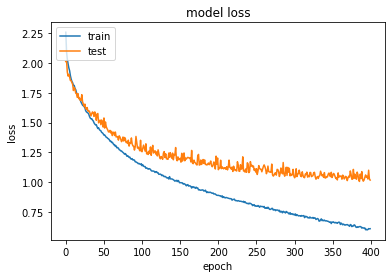

In [41]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
#save model
model_name = 'aug_all_1_Model_ravdess.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\ioann\saved_models\aug_all_1_Model_ravdess.h5 


In [43]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [44]:
#load
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/Users/ioann/saved_models/aug_all_1_Model_ravdess.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 63.16%


In [100]:
preds = loaded_model.predict(test_valid, 
                         batch_size=16, 
                         verbose=1)
preds

ValueError: Error when checking input: expected conv1d_13_input to have shape (558, 1) but got array with shape (0, 1)

In [70]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

104/104 [==============================] - 0s 1ms/step


In [179]:
preds1=preds.argmax(axis=1)
preds1

array([3, 5, 5, 3, 6, 6, 5, 5, 6, 1, 1, 1, 4, 4, 5, 6, 4, 4, 0, 4, 4, 6,
       5, 5, 5, 6, 4, 4, 4, 0, 3, 0, 0, 0, 0, 0, 3, 4, 6, 3, 2, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 3, 7, 3, 5, 4, 4, 4, 0, 4, 5, 5, 3, 5, 4, 4,
       4, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 6, 5, 6, 6, 3, 3, 3, 6,
       4, 2, 4, 0, 0, 0, 0, 4, 3, 3, 4, 6, 3, 4, 3, 3], dtype=int64)

In [180]:
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))

In [181]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,fearful
1,neutral
2,neutral
3,fearful
4,sad
5,sad
6,neutral
7,neutral
8,sad
9,calm


In [182]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [183]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,neutral
1,neutral
2,neutral
3,neutral
4,calm
5,calm
6,calm
7,calm
8,calm
9,calm


In [184]:
finaldf = actualdf.join(preddf)
finaldf

,actualvalues,predictedvalues
0,neutral,fearful
1,neutral,neutral
2,neutral,neutral
3,neutral,fearful
4,calm,sad
5,calm,sad
6,calm,neutral
7,calm,neutral
8,calm,sad
9,calm,calm


In [185]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actualvalues, predictions)


array([[10,  0,  1,  1,  4,  0,  0,  0],
       [ 0,  7,  0,  0,  4,  2,  3,  0],
       [ 0,  0,  7,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  7,  6,  0,  2,  0],
       [ 1,  0,  0,  0, 13,  1,  1,  0],
       [ 0,  0,  0,  3,  0,  5,  0,  0],
       [ 0,  0,  0,  3,  3,  4,  6,  0],
       [ 1,  0,  0,  1,  4,  1,  0,  1]], dtype=int64)

In [186]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
angry,16
calm,16
disgusted,8
fearful,16
happy,16
neutral,8
sad,16
surprised,8


In [187]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
angry,12
calm,7
disgusted,9
fearful,16
happy,34
neutral,13
sad,12
surprised,1


In [188]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [189]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
accuracy_score(y_true, y_pred)*100

53.84615384615385

In [190]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro') *100

52.88743631510575

In [191]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_true, y_pred)
c

array([[10,  0,  1,  1,  4,  0,  0,  0],
       [ 0,  7,  0,  0,  4,  2,  3,  0],
       [ 0,  0,  7,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  7,  6,  0,  2,  0],
       [ 1,  0,  0,  0, 13,  1,  1,  0],
       [ 0,  0,  0,  3,  0,  5,  0,  0],
       [ 0,  0,  0,  3,  3,  4,  6,  0],
       [ 1,  0,  0,  1,  4,  1,  0,  1]], dtype=int64)

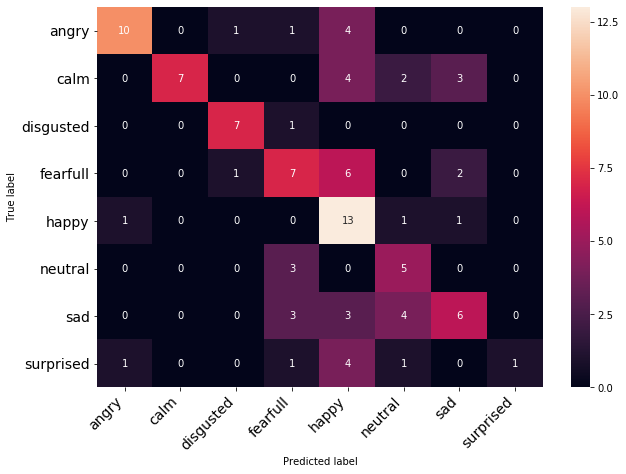

In [192]:
class_names = ['angry', 'calm', 'disgusted', 'fearfull', 'happy', 'neutral', 'sad', 'surprised']


print_confusion_matrix(c, class_names)

In [492]:
##########################male


In [12]:
def build_ravdess_gender(file_list):
    
   
    df = { 'gender': [] }
   

    for file in file_list:
        

        props = file.split('-')
        if int(props[7][:2]) % 2 == 0:
            df['gender'].append('female')
        else:
            df['gender'].append('male')

       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties


In [13]:
gender_list=build_ravdess_gender(ravdess_clean_list)
gender = pd.DataFrame(gender_list)

In [14]:
#xoris aug
newdf_gender = pd.concat([df,labels,gender], axis=1)
rnewdf_gender = newdf_gender.rename(index=str, columns={"0": "label"})

In [195]:
newdf_gender = pd.concat([df,df3,df4,labels,gender], axis=1)
rnewdf_gender = newdf_gender.rename(index=str, columns={"0": "label"})


In [15]:
rnewdf_gender

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,emotion,gender
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.042008,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,neutral,male
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,2.558635,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,neutral,female
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-1.024787,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,neutral,male
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-1.408215,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,neutral,female
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.972097,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,neutral,male
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,4.206937,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,neutral,female
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-1.683185,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,neutral,male
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,2.985039,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,neutral,female
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,1.080048,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,neutral,male
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,5.605457,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,neutral,female


In [ ]:
#####################################################LOSO##########################################################

In [16]:
def build_ravdess_onesub(file_list):
    
   
    df = { 'actor': [] }
   

    for file in file_list:
        

        props = file.split('-')
        df['actor'].append(props[7])
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [17]:
actor_list=build_ravdess_onesub(ravdess_clean_list)
actor = pd.DataFrame(actor_list)

In [18]:
#xoris aug
newdf = pd.concat([df,labels,actor,gender], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
rnewdf=rnewdf.fillna(0)


In [457]:
newdf = pd.concat([df,df3,df4,labels,actor,gender], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
rnewdf=rnewdf.fillna(0)


In [19]:
rnewdf

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,emotion,actor,gender
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,neutral,01.wav,male
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,neutral,02.wav,female
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,neutral,03.wav,male
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,neutral,04.wav,female
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,neutral,05.wav,male
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,neutral,06.wav,female
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,neutral,07.wav,male
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,neutral,08.wav,female
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,neutral,09.wav,male
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,neutral,10.wav,female


In [ ]:
#######################################################################################################################

In [380]:
male_df=(rnewdf.loc[rnewdf['gender'] != 'female'])

male_df=male_df.fillna(0)
male_df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,emotion,actor,gender
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,neutral,01.wav,male
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,neutral,03.wav,male
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,neutral,05.wav,male
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,neutral,07.wav,male
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,neutral,09.wav,male
10,-734.559104,66.724170,19.973302,24.432135,8.267443,10.193674,3.384751,5.832733,-2.836397,4.247270,...,0.409593,-0.970139,-0.998077,-0.801911,-1.194514,-1.572553,-0.679407,neutral,11.wav,male
12,-737.222784,68.615129,-0.249202,14.366146,6.971780,4.769932,-3.964833,0.740859,-6.925254,3.283133,...,0.218809,0.430849,0.554459,-0.558221,-1.556306,-1.882601,-0.562863,neutral,13.wav,male
14,-638.686598,72.511378,-5.997497,15.943515,7.175803,1.197456,-1.932479,1.161894,-6.393956,1.198193,...,-0.381267,-0.498064,0.580211,-0.288043,1.125915,0.291572,0.333098,neutral,15.wav,male
16,-646.566034,78.240240,5.812849,23.272988,13.461742,11.165088,6.540210,-2.067871,-7.179390,9.426169,...,-0.431788,-0.993862,-1.745499,-0.998088,-1.758631,-1.363380,-2.398707,neutral,17.wav,male
18,-723.215910,80.465438,8.933278,21.701921,4.516072,10.858137,1.185063,0.157663,-8.158168,3.154788,...,1.425363,-0.862558,1.228814,-0.960936,-2.644739,-2.159275,-0.943426,neutral,19.wav,male


In [704]:
###########################333loso#########################################
#test ston 24
train=(male_df.loc[male_df['actor'] != '23.wav'])
trainfeatures = train.iloc[:, :-3]
trainlabel = train.iloc[:, -3]
test=(male_df.loc[male_df['actor'] == '23.wav'])
testfeatures = test.iloc[:, :-3]
testlabel = test.iloc[:, -3]


In [705]:
testlabel

22      neutral
46      neutral
70      neutral
94      neutral
118        calm
142        calm
166        calm
190        calm
214        calm
238        calm
262        calm
286        calm
310       happy
334       happy
358       happy
382       happy
406       happy
430       happy
454       happy
478       happy
502         sad
526         sad
550         sad
574         sad
598         sad
622         sad
646         sad
670         sad
694       angry
718       angry
         ...   
1783      happy
1806      happy
1829      happy
1852      happy
1875      happy
1898      happy
1921        sad
1944        sad
1967        sad
1990        sad
2013        sad
2036        sad
2059        sad
2082        sad
2105      angry
2128      angry
2151      angry
2174      angry
2197      angry
2220      angry
2243      angry
2266      angry
2289    fearful
2312    fearful
2335    fearful
2358    fearful
2381    fearful
2404    fearful
2427    fearful
2450    fearful
Name: emotion, Length: 1

In [575]:
#############################################################################################################

In [576]:
male_df_new = np.random.rand(len(male_df)) < 0.8
train = male_df[male_df_new]
test = male_df[~male_df_new]

In [382]:
trainfeatures = train.iloc[:, :-3]

trainlabel = train.iloc[:, -3]

In [383]:
testfeatures = test.iloc[:, :-3]
testlabel = test.iloc[:, -3]

In [384]:
testlabel

8       neutral
12      neutral
14      neutral
24      neutral
36      neutral
38      neutral
50      neutral
60      neutral
62      neutral
66      neutral
68      neutral
90      neutral
96         calm
106        calm
124        calm
148        calm
164        calm
166        calm
168        calm
172        calm
174        calm
176        calm
184        calm
186        calm
204        calm
216        calm
230        calm
234        calm
250        calm
254        calm
         ...   
2103      angry
2107      angry
2109      angry
2117      angry
2119      angry
2157      angry
2163      angry
2167      angry
2172      angry
2184      angry
2213      angry
2249      angry
2253      angry
2264      angry
2310    fearful
2320    fearful
2330    fearful
2347    fearful
2354    fearful
2362    fearful
2372    fearful
2374    fearful
2376    fearful
2397    fearful
2402    fearful
2408    fearful
2431    fearful
2441    fearful
2443    fearful
2450    fearful
Name: emotion, Length: 2

In [385]:
######################################################################

In [706]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [707]:
#for cnn
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [708]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
model = Sequential()



model.add(Conv1D(256, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [709]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_105 (Conv1D)          (None, 40, 256)           1536      
_________________________________________________________________
activation_131 (Activation)  (None, 40, 256)           0         
_________________________________________________________________
conv1d_106 (Conv1D)          (None, 40, 128)           163968    
_________________________________________________________________
activation_132 (Activation)  (None, 40, 128)           0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
conv1d_107 (Conv1D)          (None, 5, 128)          

In [710]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [711]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=400, validation_data=(x_testcnn, y_test))

Train on 1144 samples, validate on 104 samples
Epoch 1/400
1144/1144 [==============================] - 1s 1ms/step - loss: 2.5900 - accuracy: 0.1827 - val_loss: 1.9976 - val_accuracy: 0.1538
Epoch 2/400
1144/1144 [==============================] - 1s 463us/step - loss: 2.1033 - accuracy: 0.1888 - val_loss: 1.9813 - val_accuracy: 0.1827
Epoch 3/400
1144/1144 [==============================] - 1s 445us/step - loss: 2.0953 - accuracy: 0.1836 - val_loss: 1.9807 - val_accuracy: 0.2404
Epoch 4/400
1144/1144 [==============================] - 1s 451us/step - loss: 2.0439 - accuracy: 0.1678 - val_loss: 1.9519 - val_accuracy: 0.2596
Epoch 5/400
1144/1144 [==============================] - 1s 442us/step - loss: 2.0163 - accuracy: 0.1984 - val_loss: 1.9090 - val_accuracy: 0.2404
Epoch 6/400
1144/1144 [==============================] - 1s 452us/step - loss: 1.9667 - accuracy: 0.2404 - val_loss: 1.8951 - val_accuracy: 0.2692
Epoch 7/400
1144/1144 [==============================] - 1s 439us/step - 

1144/1144 [==============================] - 1s 444us/step - loss: 1.0453 - accuracy: 0.6241 - val_loss: 1.3987 - val_accuracy: 0.4904
Epoch 112/400
1144/1144 [==============================] - 1s 444us/step - loss: 1.0536 - accuracy: 0.6302 - val_loss: 1.3683 - val_accuracy: 0.4904
Epoch 113/400
1144/1144 [==============================] - 1s 446us/step - loss: 1.0403 - accuracy: 0.6320 - val_loss: 1.4243 - val_accuracy: 0.3846
Epoch 114/400
1144/1144 [==============================] - 1s 441us/step - loss: 1.0397 - accuracy: 0.6198 - val_loss: 1.3811 - val_accuracy: 0.4904
Epoch 115/400
1144/1144 [==============================] - 1s 445us/step - loss: 1.0335 - accuracy: 0.6460 - val_loss: 1.3513 - val_accuracy: 0.5192
Epoch 116/400
1144/1144 [==============================] - 1s 444us/step - loss: 1.0333 - accuracy: 0.6399 - val_loss: 1.4226 - val_accuracy: 0.4038
Epoch 117/400
1144/1144 [==============================] - 1s 443us/step - loss: 1.0325 - accuracy: 0.6355 - val_loss: 1

1144/1144 [==============================] - 1s 441us/step - loss: 0.8849 - accuracy: 0.6967 - val_loss: 1.3624 - val_accuracy: 0.4519
Epoch 167/400
1144/1144 [==============================] - 1s 447us/step - loss: 0.8731 - accuracy: 0.7063 - val_loss: 1.4451 - val_accuracy: 0.4808
Epoch 168/400
1144/1144 [==============================] - 1s 440us/step - loss: 0.8708 - accuracy: 0.7010 - val_loss: 1.4630 - val_accuracy: 0.4519
Epoch 169/400
1144/1144 [==============================] - 1s 439us/step - loss: 0.8669 - accuracy: 0.6871 - val_loss: 1.3151 - val_accuracy: 0.5288
Epoch 170/400
1144/1144 [==============================] - 1s 440us/step - loss: 0.8642 - accuracy: 0.7054 - val_loss: 1.4381 - val_accuracy: 0.4615
Epoch 171/400
1144/1144 [==============================] - 1s 442us/step - loss: 0.8650 - accuracy: 0.7080 - val_loss: 1.4084 - val_accuracy: 0.4327
Epoch 172/400
1144/1144 [==============================] - 1s 445us/step - loss: 0.8628 - accuracy: 0.6976 - val_loss: 1

1144/1144 [==============================] - 1s 458us/step - loss: 0.7620 - accuracy: 0.7456 - val_loss: 1.3754 - val_accuracy: 0.5000
Epoch 222/400
1144/1144 [==============================] - 1s 450us/step - loss: 0.7451 - accuracy: 0.7439 - val_loss: 1.3314 - val_accuracy: 0.5000
Epoch 223/400
1144/1144 [==============================] - 1s 453us/step - loss: 0.7562 - accuracy: 0.7386 - val_loss: 1.4313 - val_accuracy: 0.4808
Epoch 224/400
1144/1144 [==============================] - 1s 457us/step - loss: 0.7549 - accuracy: 0.7430 - val_loss: 1.3708 - val_accuracy: 0.5096
Epoch 225/400
1144/1144 [==============================] - 1s 459us/step - loss: 0.7454 - accuracy: 0.7465 - val_loss: 1.3879 - val_accuracy: 0.4327
Epoch 226/400
1144/1144 [==============================] - 1s 478us/step - loss: 0.7457 - accuracy: 0.7430 - val_loss: 1.3199 - val_accuracy: 0.4904
Epoch 227/400
1144/1144 [==============================] - 1s 463us/step - loss: 0.7338 - accuracy: 0.7483 - val_loss: 1

1144/1144 [==============================] - 1s 448us/step - loss: 0.6483 - accuracy: 0.7762 - val_loss: 1.5322 - val_accuracy: 0.4519
Epoch 277/400
1144/1144 [==============================] - 1s 444us/step - loss: 0.6469 - accuracy: 0.7797 - val_loss: 1.5936 - val_accuracy: 0.4712
Epoch 278/400
1144/1144 [==============================] - 1s 449us/step - loss: 0.6453 - accuracy: 0.7841 - val_loss: 1.5068 - val_accuracy: 0.5096
Epoch 279/400
1144/1144 [==============================] - 1s 439us/step - loss: 0.6408 - accuracy: 0.7885 - val_loss: 1.4546 - val_accuracy: 0.5000
Epoch 280/400
1144/1144 [==============================] - 1s 444us/step - loss: 0.6396 - accuracy: 0.7832 - val_loss: 1.4741 - val_accuracy: 0.4904
Epoch 281/400
1144/1144 [==============================] - 1s 442us/step - loss: 0.6260 - accuracy: 0.7981 - val_loss: 1.4492 - val_accuracy: 0.4808
Epoch 282/400
1144/1144 [==============================] - 1s 454us/step - loss: 0.6377 - accuracy: 0.7762 - val_loss: 1

1144/1144 [==============================] - 1s 459us/step - loss: 0.5639 - accuracy: 0.8068 - val_loss: 1.4362 - val_accuracy: 0.5192
Epoch 332/400
1144/1144 [==============================] - 1s 447us/step - loss: 0.5639 - accuracy: 0.8164 - val_loss: 1.6203 - val_accuracy: 0.4904
Epoch 333/400
1144/1144 [==============================] - 1s 456us/step - loss: 0.5513 - accuracy: 0.8173 - val_loss: 1.6635 - val_accuracy: 0.5000
Epoch 334/400
1144/1144 [==============================] - 1s 449us/step - loss: 0.5459 - accuracy: 0.8147 - val_loss: 1.5225 - val_accuracy: 0.4712
Epoch 335/400
1144/1144 [==============================] - 1s 448us/step - loss: 0.5520 - accuracy: 0.8147 - val_loss: 1.5109 - val_accuracy: 0.5192
Epoch 336/400
1144/1144 [==============================] - 1s 438us/step - loss: 0.5531 - accuracy: 0.8147 - val_loss: 1.4868 - val_accuracy: 0.4904
Epoch 337/400
1144/1144 [==============================] - 0s 436us/step - loss: 0.5451 - accuracy: 0.8208 - val_loss: 1

1144/1144 [==============================] - 0s 395us/step - loss: 0.4865 - accuracy: 0.8383 - val_loss: 1.5915 - val_accuracy: 0.4904
Epoch 387/400
1144/1144 [==============================] - 0s 390us/step - loss: 0.4925 - accuracy: 0.8374 - val_loss: 1.5958 - val_accuracy: 0.4808
Epoch 388/400
1144/1144 [==============================] - 0s 392us/step - loss: 0.4816 - accuracy: 0.8409 - val_loss: 1.6415 - val_accuracy: 0.5000
Epoch 389/400
1144/1144 [==============================] - 0s 391us/step - loss: 0.4841 - accuracy: 0.8444 - val_loss: 1.6291 - val_accuracy: 0.4808
Epoch 390/400
1144/1144 [==============================] - 0s 397us/step - loss: 0.4772 - accuracy: 0.8400 - val_loss: 1.6555 - val_accuracy: 0.5000
Epoch 391/400
1144/1144 [==============================] - 0s 417us/step - loss: 0.4677 - accuracy: 0.8540 - val_loss: 1.6293 - val_accuracy: 0.5000
Epoch 392/400
1144/1144 [==============================] - 0s 420us/step - loss: 0.4718 - accuracy: 0.8488 - val_loss: 1

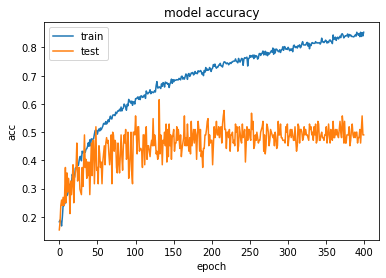

In [712]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

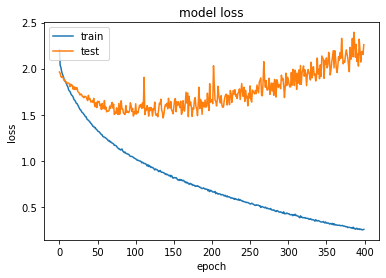

In [529]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [713]:
#save model
model_name = 'male_Model_23_ravdess.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\ioann\saved_models\male_Model_23_ravdess.h5 


In [714]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [715]:
#load
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/Users/ioann/saved_models/male_Model_23_ravdess.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 49.04%


In [716]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

104/104 [==============================] - 1s 7ms/step


In [717]:
preds1=preds.argmax(axis=1)
preds1

array([3, 4, 3, 7, 0, 3, 7, 7, 4, 6, 3, 4, 7, 7, 3, 3, 7, 7, 7, 7, 6, 5,
       3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 0, 0, 0, 0, 3, 3, 7, 7, 3, 3, 3, 3,
       2, 2, 2, 2, 7, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 4, 1,
       4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 6, 6, 3, 6, 6, 6, 6, 6,
       4, 0, 3, 3, 4, 0, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4], dtype=int64)

In [718]:
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))

In [719]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,fearful
1,happy
2,fearful
3,surprised
4,angry
5,fearful
6,surprised
7,surprised
8,happy
9,sad


In [720]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [721]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,neutral
1,neutral
2,neutral
3,neutral
4,calm
5,calm
6,calm
7,calm
8,calm
9,calm


In [722]:
finaldf = actualdf.join(preddf)

In [723]:
finaldf.groupby('actualvalues').count()


,predictedvalues
actualvalues,
angry,16
calm,16
disgusted,8
fearful,16
happy,16
neutral,8
sad,16
surprised,8


In [724]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
angry,8
calm,3
disgusted,4
fearful,28
happy,21
neutral,5
sad,9
surprised,26


In [725]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actualvalues, predictions)

array([[ 6,  0,  0,  3,  3,  0,  0,  4],
       [ 1,  2,  0,  2,  8,  0,  1,  2],
       [ 1,  0,  4,  0,  0,  0,  0,  3],
       [ 0,  0,  0, 12,  2,  0,  0,  2],
       [ 0,  1,  0,  2,  7,  0,  0,  6],
       [ 0,  0,  0,  2,  1,  4,  0,  1],
       [ 0,  0,  0,  7,  0,  1,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8]], dtype=int64)

In [726]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [727]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
accuracy_score(y_true, y_pred)*100

49.03846153846153

In [728]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_true, y_pred)
c

array([[ 6,  0,  0,  3,  3,  0,  0,  4],
       [ 1,  2,  0,  2,  8,  0,  1,  2],
       [ 1,  0,  4,  0,  0,  0,  0,  3],
       [ 0,  0,  0, 12,  2,  0,  0,  2],
       [ 0,  1,  0,  2,  7,  0,  0,  6],
       [ 0,  0,  0,  2,  1,  4,  0,  1],
       [ 0,  0,  0,  7,  0,  1,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8]], dtype=int64)

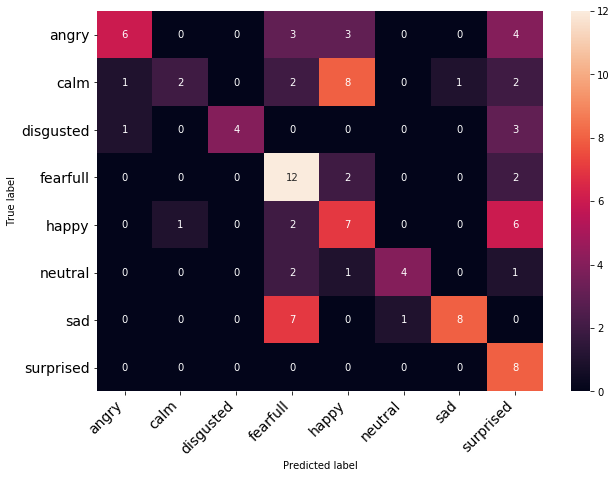

In [729]:
class_names = ['angry', 'calm', 'disgusted', 'fearfull', 'happy', 'neutral', 'sad', 'surprised']


print_confusion_matrix(c, class_names)